___
# Support Vector Machines with Python

Github link: https://github.com/TrangNguyen95/SupervisedLearning


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
df_target=pd.DataFrame(df['Purchased'],columns=['Purchased'])

In [7]:
df_target.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [8]:
dummies=pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
df1=df.drop(['Gender'],axis=1)

In [10]:
df2=pd.concat([df1,dummies],axis=1).reset_index()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
index              400 non-null int64
User ID            400 non-null int64
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
Male               400 non-null uint8
dtypes: int64(5), uint8(1)
memory usage: 16.1 KB


## EDA



Text(0.5,1,'EDA')

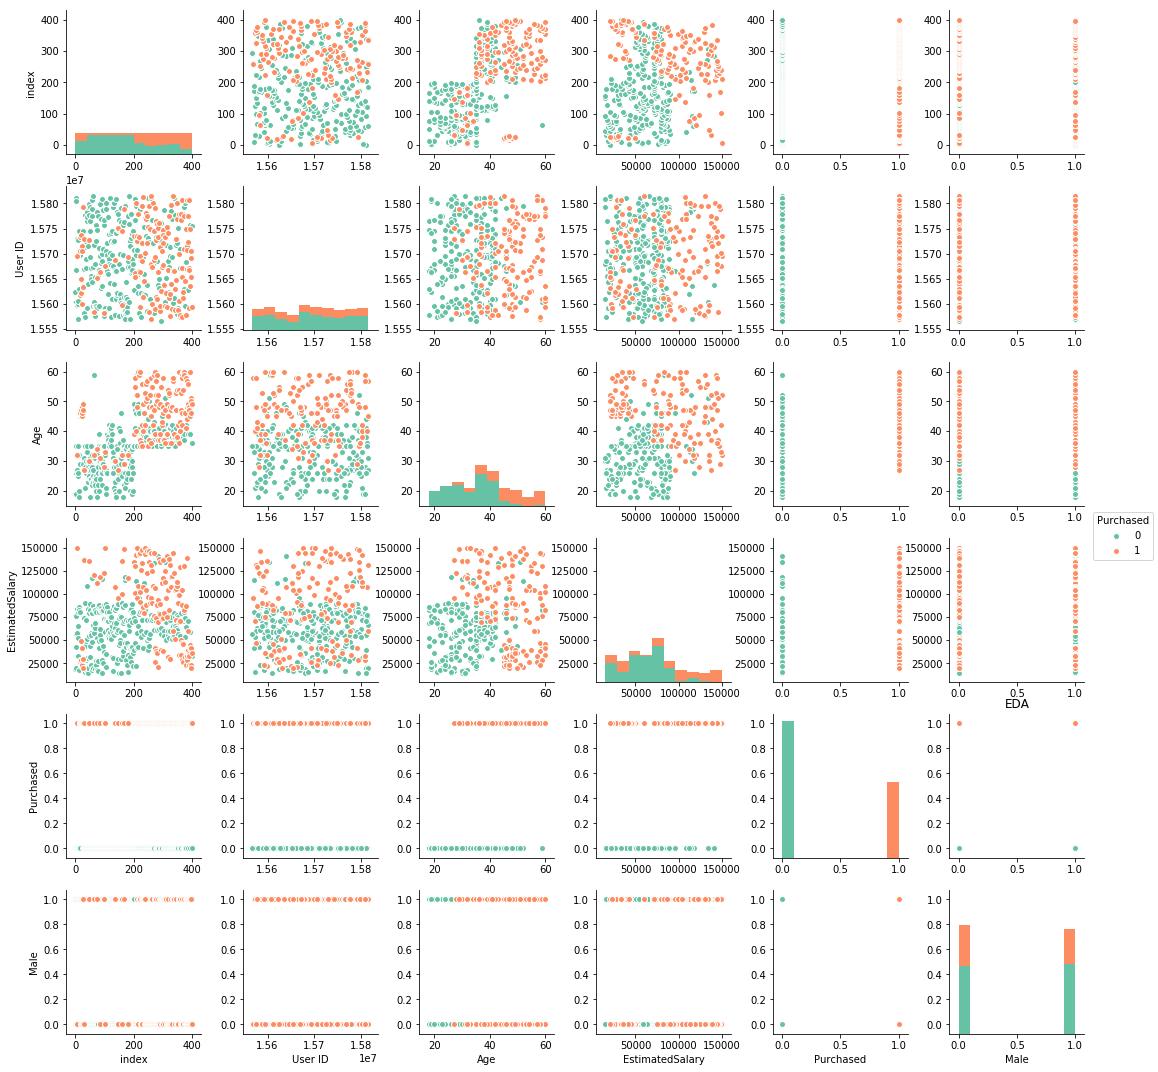

In [16]:
sns.pairplot(df2,hue='Purchased',palette='Set2')
plt.title('EDA')

## Train Test Split


In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X=df2.drop('Purchased',axis=1)
y=np.ravel(df_target)

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.svm import SVC

In [22]:
model=SVC()

In [23]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations


In [24]:
predictions=model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[68  0]
 [32  0]]


In [27]:
confusion2=pd.crosstab(y_test,predictions,rownames=['Actual'],colnames=['Prediction'],margins=True)

In [28]:
print(confusion2)

Prediction    0  All
Actual              
0            68   68
1            32   32
All         100  100


In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.68      1.00      0.81        68
          1       0.00      0.00      0.00        32

avg / total       0.46      0.68      0.55       100



C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The model classified eveything into a single class; therefore, we need to adjust its parameters. GridSearch will help performing this task.

## Gridsearch

gamma = 1/n_feature

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler

In [32]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [33]:
scaler = StandardScaler()
X_trainfit = scaler.fit_transform(X_train)
X_testfit = scaler.fit_transform(X_test)
y_trainfit = scaler.fit_transform(y_train.reshape(-1,1))
y_testfit = scaler.fit_transform(y_test.reshape(-1,1))

C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [35]:
#cv= train_test_split(X, y, test_size = 0.25, random_state = 0)
grid4 = GridSearchCV(SVC(), param_grid=param_grid,refit=True,verbose=3)
grid4.fit(X_train,y_train)

Fitting 3 folds for each of 169 candidates, totalling 507 fits
[CV] C=0.01, gamma=1e-09 .............................................
[CV] .................. C=0.01, gamma=1e-09, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-09 .............................................
[CV] .................. C=0.01, gamma=1e-09, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-09 .............................................
[CV] .................. C=0.01, gamma=1e-09, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-08 .............................................
[CV] .................. C=0.01, gamma=1e-08, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-08 .............................................
[CV] .................. C=0.01, gamma=1e-08, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-08 .............................................
[CV] .................. C=0.01, gamma=1e-08, score=0.63, total=   0.0s
[CV] C=0.01, gamma=1e-07 .............................................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.01, gamma=0.0001, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] ................. C=0.01, gamma=0.0001, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................. C=0.01, gamma=0.001, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................. C=0.01, gamma=0.001, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .................. C=0.01, gamma=0.001, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ................... C=0.01, gamma=0.01, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ................... C=0.01, gamma=0.01, score=0.63, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .

[CV] ................... C=1.0, gamma=1e-05, score=0.63, total=   0.0s
[CV] C=1.0, gamma=1e-05 ..............................................
[CV] ................... C=1.0, gamma=1e-05, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .................. C=1.0, gamma=0.0001, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .................. C=1.0, gamma=0.0001, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.0001 .............................................
[CV] .................. C=1.0, gamma=0.0001, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ................... C=1.0, gamma=0.001, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] ................... C=1.0, gamma=0.001, score=0.63, total=   0.0s
[CV] C=1.0, gamma=0.001 ..............................................
[CV] .

[CV] ................. C=100.0, gamma=1e-07, score=0.58, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................. C=100.0, gamma=1e-06, score=0.64, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................. C=100.0, gamma=1e-06, score=0.63, total=   0.0s
[CV] C=100.0, gamma=1e-06 ............................................
[CV] ................. C=100.0, gamma=1e-06, score=0.63, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................. C=100.0, gamma=1e-05, score=0.63, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................. C=100.0, gamma=1e-05, score=0.63, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ................. C=100.0, gamma=1e-05, score=0.63, total=   0.0s
[CV] C=100.0, gamma=0.0001 ...........................................
[CV] .

[CV] ................. C=1000.0, gamma=10.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=10.0 ............................................
[CV] ................. C=1000.0, gamma=10.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] ................ C=1000.0, gamma=100.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] ................ C=1000.0, gamma=100.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] ................ C=1000.0, gamma=100.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] ............... C=1000.0, gamma=1000.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] ............... C=1000.0, gamma=1000.0, score=0.63, total=   0.0s
[CV] C=1000.0, gamma=1000.0 ..........................................
[CV] .

[CV] .............. C=100000.0, gamma=0.001, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.001 .........................................
[CV] .............. C=100000.0, gamma=0.001, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] ............... C=100000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] ............... C=100000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.01 ..........................................
[CV] ............... C=100000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ................ C=100000.0, gamma=0.1, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] ................ C=100000.0, gamma=0.1, score=0.63, total=   0.0s
[CV] C=100000.0, gamma=0.1 ...........................................
[CV] .

[CV] ............ C=10000000.0, gamma=1e-09, score=0.74, total=   0.1s
[CV] C=10000000.0, gamma=1e-09 .......................................
[CV] ............ C=10000000.0, gamma=1e-09, score=0.71, total=   0.0s
[CV] C=10000000.0, gamma=1e-09 .......................................
[CV] ............ C=10000000.0, gamma=1e-09, score=0.69, total=   0.7s
[CV] C=10000000.0, gamma=1e-08 .......................................
[CV] ............ C=10000000.0, gamma=1e-08, score=0.64, total=   0.0s
[CV] C=10000000.0, gamma=1e-08 .......................................
[CV] ............ C=10000000.0, gamma=1e-08, score=0.65, total=   0.0s
[CV] C=10000000.0, gamma=1e-08 .......................................
[CV] ............ C=10000000.0, gamma=1e-08, score=0.67, total=   0.0s
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] ............. C=10000000.0, gamma=1e-07, score=0.6, total=   0.0s
[CV] C=10000000.0, gamma=1e-07 .......................................
[CV] .

[CV] ........... C=100000000.0, gamma=0.001, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.01 .......................................
[CV] ............ C=100000000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.01 .......................................
[CV] ............ C=100000000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.01 .......................................
[CV] ............ C=100000000.0, gamma=0.01, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.1 ........................................
[CV] ............. C=100000000.0, gamma=0.1, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.1 ........................................
[CV] ............. C=100000000.0, gamma=0.1, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=0.1 ........................................
[CV] ............. C=100000000.0, gamma=0.1, score=0.63, total=   0.0s
[CV] C=100000000.0, gamma=1.0 ........................................
[CV] .

[CV] ......... C=10000000000.0, gamma=1e-09, score=0.74, total=   0.1s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ......... C=10000000000.0, gamma=1e-09, score=0.71, total=   0.0s
[CV] C=10000000000.0, gamma=1e-09 ....................................
[CV] ......... C=10000000000.0, gamma=1e-09, score=0.69, total=   0.6s
[CV] C=10000000000.0, gamma=1e-08 ....................................
[CV] ......... C=10000000000.0, gamma=1e-08, score=0.64, total=   0.0s
[CV] C=10000000000.0, gamma=1e-08 ....................................
[CV] ......... C=10000000000.0, gamma=1e-08, score=0.65, total=   0.0s
[CV] C=10000000000.0, gamma=1e-08 ....................................
[CV] ......... C=10000000000.0, gamma=1e-08, score=0.67, total=   0.0s
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] .......... C=10000000000.0, gamma=1e-07, score=0.6, total=   0.0s
[CV] C=10000000000.0, gamma=1e-07 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 507 out of 507 | elapsed:   13.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-09,   1.00000e-08,   1.00000e-07,   1.00000e-06,
         1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03]), 'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [36]:
print("The best parameters are %s with a score of %0.2f"
      % (grid4.best_params_, grid4.best_score_))

The best parameters are {'C': 1.0, 'gamma': 1.0000000000000001e-09} with a score of 0.80


In [37]:
grid_predictions4=grid4.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions4))

[[60  8]
 [17 15]]


In [39]:
print(classification_report(y_test,grid_predictions4))

             precision    recall  f1-score   support

          0       0.78      0.88      0.83        68
          1       0.65      0.47      0.55        32

avg / total       0.74      0.75      0.74       100



## Visualize

In [ ]:
#Try1

In [43]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

NameError: name 'C' is not defined

In [183]:
#have to install via conda or 'pip install -c rasbt mlxtend'  

Exception:
Traceback (most recent call last):
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\commands\install.py", line 335, in run
    wb.build(autobuilding=True)
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\req\req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\req\req_set.py", line 554, in _prepare_file
    require_hashes
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\req\req_install.py", line 278, in populate_link
    self.link = finder.find_requirement(self, upgrade)
  File "C:\Users\Trang\Anaconda3\lib\site-packages\pip\index.py", line 465, in find_requirement
    all_candidates = self.find_all_candida

In [40]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X_testfit.values, 
                      y=y_testfit.values,
                      clf=grid4, 
                      legend=2)


ModuleNotFoundError: No module named 'mlxtend'

In [41]:
#Note: I ran into difficulty in installing mlxtend package